# **0. IMPORT LIBRARY**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SVMSMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [117]:
sns.set_style('whitegrid')

# **1. LOAD DATASET**

In [118]:
# I used dataset that was unzipped and merged by Saurabh Zinjad (Ztrimus)
# different session generates different token, so data_url requires to be updated.

data_url = 'https://raw.githubusercontent.com/OmdenaAI/Dryad/task-1-data-preprocessing/AA%20Dataset/data_conversion_from_zip_saurabh_zinjad.csv?token=ARUFLQFX4G5NOELUXM5ILDLBINYKA'
df = pd.read_csv(data_url)

In [119]:
df.head()

,id,gas-scan-cnt,specimen-class,start-time,gas-scan-temp-0,gas-scan-temp-1,gas-scan-temp-2,gas-scan-temp-3,gas-scan-temp-4,gas-scan-temp-5,gas-scan-temp-6,gas-scan-temp-7,gas-scan-temp-8,gas-scan-temp-9,gas-scan-humid-0,gas-scan-humid-1,gas-scan-humid-2,gas-scan-humid-3,gas-scan-humid-4,gas-scan-humid-5,gas-scan-humid-6,gas-scan-humid-7,gas-scan-humid-8,gas-scan-humid-9,gas-scan-0,gas-scan-1,gas-scan-2,gas-scan-3,gas-scan-4,gas-scan-5,gas-scan-6,gas-scan-7,gas-scan-8,gas-scan-9,trigger,data-type,end-time,log-file,sensor-node,gas-scan-trg
0,10,3.0,in smoke,2021-08-24T11:57:09Z,21.5,21.7,22.2,22.2,22.3,22.6,22.6,22.6,22.8,22.9,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,48.0,48.0,102400000.0,677000.0,39670700.0,608700.0,3950800.0,3335500.0,2852300.0,513500.0,694200.0,780000.0,auto trigger,training,2021-08-24 13:14:07+00:00,2021_08_24_hall,130,NaN
1,10,4.0,in smoke,2021-08-24T11:57:09Z,21.6,21.8,22.3,22.3,22.4,22.6,22.7,22.7,22.9,22.9,49.0,49.0,49.0,49.0,49.0,49.0,48.0,48.0,48.0,48.0,102400000.0,713800.0,44703900.0,647400.0,4343500.0,3611100.0,3206200.0,545100.0,733700.0,809600.0,auto trigger,training,2021-08-24 13:14:07+00:00,2021_08_24_hall,130,NaN
2,10,5.0,in smoke,2021-08-24T11:57:09Z,21.7,21.8,22.3,22.3,22.4,22.7,22.7,22.7,22.9,23.0,48.0,48.0,49.0,49.0,49.0,48.0,48.0,48.0,48.0,48.0,102400000.0,744900.0,47216100.0,668400.0,4486300.0,3796900.0,3299200.0,557100.0,741700.0,811000.0,auto trigger,training,2021-08-24 13:14:07+00:00,2021_08_24_hall,130,NaN
3,10,6.0,in smoke,2021-08-24T11:57:09Z,21.7,21.9,22.4,22.4,22.5,22.7,22.8,22.7,22.9,23.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,102400000.0,740900.0,46266100.0,666400.0,4460600.0,3699200.0,3265600.0,552100.0,740100.0,805800.0,auto trigger,training,2021-08-24 13:14:07+00:00,2021_08_24_hall,130,NaN
4,10,7.0,in smoke,2021-08-24T11:57:09Z,21.7,21.9,22.4,22.4,22.5,22.8,22.8,22.8,23.0,23.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0,102400000.0,740900.0,46911900.0,669700.0,4446100.0,3770700.0,3283300.0,558900.0,741700.0,810100.0,auto trigger,training,2021-08-24 13:14:07+00:00,2021_08_24_hall,130,NaN


# **2. BASIC EXPLORATION**

**##**

In [120]:
df.columns

Index(['id', 'gas-scan-cnt', 'specimen-class', 'start-time', 'gas-scan-temp-0',
       'gas-scan-temp-1', 'gas-scan-temp-2', 'gas-scan-temp-3',
       'gas-scan-temp-4', 'gas-scan-temp-5', 'gas-scan-temp-6',
       'gas-scan-temp-7', 'gas-scan-temp-8', 'gas-scan-temp-9',
       'gas-scan-humid-0', 'gas-scan-humid-1', 'gas-scan-humid-2',
       'gas-scan-humid-3', 'gas-scan-humid-4', 'gas-scan-humid-5',
       'gas-scan-humid-6', 'gas-scan-humid-7', 'gas-scan-humid-8',
       'gas-scan-humid-9', 'gas-scan-0', 'gas-scan-1', 'gas-scan-2',
       'gas-scan-3', 'gas-scan-4', 'gas-scan-5', 'gas-scan-6', 'gas-scan-7',
       'gas-scan-8', 'gas-scan-9', 'trigger', 'data-type', 'end-time',
       'log-file', 'sensor-node', 'gas-scan-trg'],
      dtype='object')

**##**

In [121]:
df.shape

(17620, 40)

**##**

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17620 entries, 0 to 17619
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17620 non-null  int64  
 1   gas-scan-cnt      17620 non-null  float64
 2   specimen-class    17620 non-null  object 
 3   start-time        17620 non-null  object 
 4   gas-scan-temp-0   17620 non-null  float64
 5   gas-scan-temp-1   17620 non-null  float64
 6   gas-scan-temp-2   17620 non-null  float64
 7   gas-scan-temp-3   17620 non-null  float64
 8   gas-scan-temp-4   17620 non-null  float64
 9   gas-scan-temp-5   17620 non-null  float64
 10  gas-scan-temp-6   17620 non-null  float64
 11  gas-scan-temp-7   17620 non-null  float64
 12  gas-scan-temp-8   17620 non-null  float64
 13  gas-scan-temp-9   17620 non-null  float64
 14  gas-scan-humid-0  17620 non-null  float64
 15  gas-scan-humid-1  17620 non-null  float64
 16  gas-scan-humid-2  17620 non-null  float6

**##**

In [123]:
df.describe()

,id,gas-scan-cnt,gas-scan-temp-0,gas-scan-temp-1,gas-scan-temp-2,gas-scan-temp-3,gas-scan-temp-4,gas-scan-temp-5,gas-scan-temp-6,gas-scan-temp-7,gas-scan-temp-8,gas-scan-temp-9,gas-scan-humid-0,gas-scan-humid-1,gas-scan-humid-2,gas-scan-humid-3,gas-scan-humid-4,gas-scan-humid-5,gas-scan-humid-6,gas-scan-humid-7,gas-scan-humid-8,gas-scan-humid-9,gas-scan-0,gas-scan-1,gas-scan-2,gas-scan-3,gas-scan-4,gas-scan-5,gas-scan-6,gas-scan-7,gas-scan-8,gas-scan-9,sensor-node,gas-scan-trg
count,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,1.762000e+04,1.762000e+04,1.762000e+04,1.762000e+04,1.762000e+04,1.762000e+04,1.762000e+04,1.762000e+04,1.762000e+04,1.762000e+04,17620.000000,17241.000000
mean,689.872872,11.272134,21.911839,22.008842,22.710454,22.705766,22.794654,22.921759,23.043944,23.034614,23.451646,23.792401,56.654143,56.709081,56.697276,56.691033,56.697787,56.503632,56.208797,56.186152,56.012145,55.746652,8.861928e+07,1.069583e+06,1.462896e+07,9.268741e+05,2.227301e+06,1.945908e+06,1.712135e+06,8.945170e+05,1.023338e+06,1.036314e+06,141.141090,0.002494
std,258.299562,5.787054,7.472594,7.356447,7.842856,7.814337,7.830453,7.559521,7.744787,7.772666,8.290788,8.917323,9.775470,9.775082,9.668814,9.665669,9.664201,9.620316,9.563998,9.559441,9.534245,9.506678,3.025857e+07,7.165917e+06,1.848402e+07,6.700976e+06,7.235851e+06,7.153016e+06,6.806387e+06,6.739224e+06,6.714419e+06,6.563024e+06,4.616044,0.049880
min,10.000000,0.000000,-10.000000,-10.000000,-9.700000,-9.700000,-9.700000,-9.600000,-9.500000,-9.500000,-9.400000,-9.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,130.000000,0.000000
25%,627.000000,5.000000,20.300000,20.400000,20.900000,20.900000,21.000000,21.300000,21.300000,21.300000,21.500000,21.600000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000,1.024000e+08,1.432000e+05,2.746200e+06,1.100000e+05,5.036000e+05,3.498250e+05,2.866500e+05,9.540000e+04,2.154750e+05,2.498000e+05,139.000000,0.000000
50%,807.000000,15.000000,21.600000,21.800000,22.300000,22.300000,22.400000,22.600000,22.700000,22.600000,22.900000,22.900000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,58.000000,58.000000,1.024000e+08,2.593000e+05,7.755700e+06,2.059000e+05,1.051600e+06,7.845000e+05,6.426000e+05,1.658000e+05,3.159000e+05,3.618000e+05,144.000000,0.000000
75%,811.000000,16.000000,23.800000,23.900000,24.500000,24.500000,24.500000,24.800000,24.800000,24.800000,25.000000,25.100000,63.000000,63.000000,63.000000,63.000000,63.000000,62.000000,62.000000,62.000000,62.000000,62.000000,1.024000e+08,3.975000e+05,1.803410e+07,3.345000e+05,1.926600e+06,1.554700e+06,1.314900e+06,2.783000e+05,4.375500e+05,4.882000e+05,144.000000,0.000000
max,990.000000,20.000000,92.900000,92.900000,93.200000,93.200000,93.200000,93.400000,93.400000,93.400000,93.500000,93.500000,88.000000,88.000000,84.000000,84.000000,83.000000,81.000000,80.000000,80.000000,80.000000,80.000000,1.183089e+08,6.726536e+07,1.024000e+08,6.723986e+07,6.782266e+07,6.770331e+07,6.760997e+07,6.721782e+07,6.728326e+07,6.731111e+07,146.000000,1.000000


**##**

In [124]:
df.groupby(by='specimen-class').count()

,id,gas-scan-cnt,start-time,gas-scan-temp-0,gas-scan-temp-1,gas-scan-temp-2,gas-scan-temp-3,gas-scan-temp-4,gas-scan-temp-5,gas-scan-temp-6,gas-scan-temp-7,gas-scan-temp-8,gas-scan-temp-9,gas-scan-humid-0,gas-scan-humid-1,gas-scan-humid-2,gas-scan-humid-3,gas-scan-humid-4,gas-scan-humid-5,gas-scan-humid-6,gas-scan-humid-7,gas-scan-humid-8,gas-scan-humid-9,gas-scan-0,gas-scan-1,gas-scan-2,gas-scan-3,gas-scan-4,gas-scan-5,gas-scan-6,gas-scan-7,gas-scan-8,gas-scan-9,trigger,data-type,end-time,log-file,sensor-node,gas-scan-trg
specimen-class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
clean air,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
in smoke,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5425,5046
reference,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397
unsure,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57


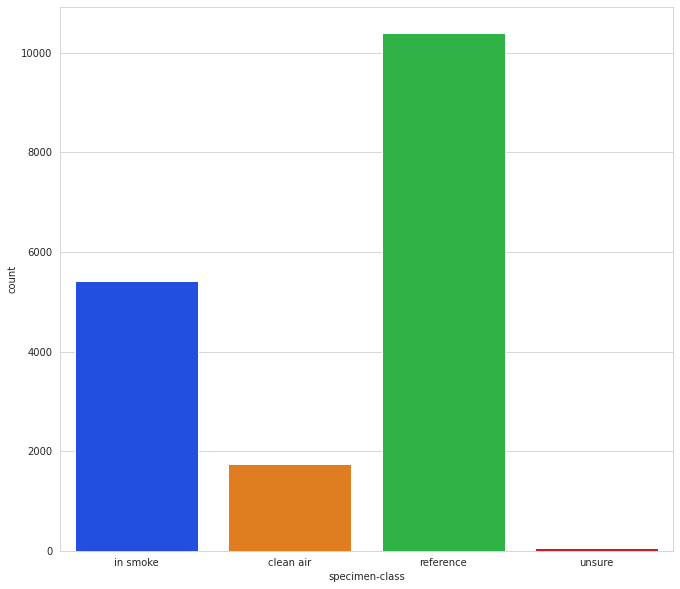

In [125]:
# plot specimen-class to see imbalance distribution

plt.figure(figsize=(11,10))
sns.countplot(data=df, x='specimen-class', palette='bright')

# **3. MODIFICATION**

**DROP UNNECESSARY COLUMNS**

In [126]:
drop_columns = ['id', 'gas-scan-cnt', 'start-time', 'trigger', 'data-type', 'end-time', 'log-file', 'sensor-node', 'gas-scan-trg']
df_dropped = df.drop(columns=drop_columns, axis=1)

**CHECK DUPLICATES**

In [127]:
df_dropped['is_duplicated'] = df_dropped.duplicated(subset=df_dropped.columns[0:31]) 

In [128]:
df_dropped[df_dropped['is_duplicated'] == True]

,specimen-class,gas-scan-temp-0,gas-scan-temp-1,gas-scan-temp-2,gas-scan-temp-3,gas-scan-temp-4,gas-scan-temp-5,gas-scan-temp-6,gas-scan-temp-7,gas-scan-temp-8,gas-scan-temp-9,gas-scan-humid-0,gas-scan-humid-1,gas-scan-humid-2,gas-scan-humid-3,gas-scan-humid-4,gas-scan-humid-5,gas-scan-humid-6,gas-scan-humid-7,gas-scan-humid-8,gas-scan-humid-9,gas-scan-0,gas-scan-1,gas-scan-2,gas-scan-3,gas-scan-4,gas-scan-5,gas-scan-6,gas-scan-7,gas-scan-8,gas-scan-9,is_duplicated
17,in smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
34,in smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
35,in smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
36,in smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
57,in smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16741,in smoke,27.1,27.2,27.8,27.8,27.8,28.1,28.1,28.1,28.3,28.4,46.0,47.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,45.0,102400000.0,242700.0,6290600.0,194500.0,945900.0,699900.0,572000.0,151700.0,299800.0,354300.0,True
16742,in smoke,27.2,27.3,27.8,27.9,27.9,28.2,28.2,28.2,28.4,28.5,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,102400000.0,286200.0,7941800.0,226900.0,1146000.0,837400.0,676300.0,171600.0,324300.0,382500.0,True
16743,in smoke,27.2,27.4,27.9,27.9,28.0,28.2,28.3,28.3,28.5,28.5,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,44.0,44.0,102400000.0,300900.0,8645900.0,240800.0,1221900.0,895100.0,716000.0,180300.0,337500.0,392700.0,True
16744,in smoke,27.3,27.4,27.9,28.0,28.0,28.3,28.3,28.3,28.5,28.5,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,102400000.0,303300.0,8806200.0,242700.0,1229600.0,893300.0,717500.0,180300.0,338500.0,394300.0,True


In [129]:
df_dropped[df_dropped['is_duplicated'] == True]['gas-scan-temp-0'].unique() #example

array([ 0. , 19.5, 19.8, 19.9, 20. , 20.1, 20.4, 20.8, 20.9, 21. , 20.3,
       20.7, 19.6, 20.2, 18.7, 19.1, 19.2, 19.3, 18.6, 18.9, 19.7, 18.4,
       18.8, 19. , 18.3, 19.4, 18.5, 20.5, 20.6, 21.1, 21.2, 21.3, 21.6,
       22. , 22.1, 22.2, 22.4, 22.5, 22.6, 22.7, 21.4, 21.5, 21.7, 22.3,
       22.8, 21.8, 21.9, 24.1, 24.4, 24.5, 24.6, 24.7, 23.9, 24.2, 24.3,
       24. , 23.8, 22.9, 23. , 23.1, 24.8, 24.9, 28.2, 28.5, 28.6, 28.7,
       28.8, 25. , 26.7, 27.1, 27.2, 27.3])

In [130]:
df_dropped[df_dropped['is_duplicated'] == True]['gas-scan-humid-0'].unique() #example

array([ 0., 69., 64., 63., 62., 68., 61., 60., 65., 70., 72., 66., 73.,
       67., 74., 71., 75., 76., 78., 77., 59., 58., 54., 50., 49., 53.,
       57., 52., 51., 56., 55., 44., 41., 40., 46., 45.])

In [131]:
df_dropped[df_dropped['is_duplicated'] == True]['gas-scan-0'].unique() #example

array([0.00000000e+00, 1.02400000e+08, 6.58322000e+07, 9.23367040e+07,
       7.66278000e+07, 9.77055040e+07, 5.89882000e+07, 9.81444960e+07,
       1.02280096e+08, 2.42142000e+07, 8.16392960e+07, 4.08060000e+06,
       4.25550000e+06, 1.32610000e+07, 8.94079040e+07, 9.99404960e+07,
       1.39378000e+07, 9.78148960e+07, 4.39838000e+07, 8.86820000e+07,
       2.07195000e+07, 8.96832000e+07, 8.21768000e+07, 6.80892960e+07,
       8.62800000e+05, 3.98880000e+07, 5.34333000e+07, 5.80092000e+07,
       6.14784000e+07, 6.21783000e+07, 1.12219000e+07, 3.08695000e+07,
       3.33177000e+07, 3.49152000e+07, 2.48760000e+07, 3.62477000e+07,
       1.29236000e+07, 3.33686000e+07, 3.68593000e+07, 3.86187000e+07,
       2.84197000e+07, 4.27362000e+07, 7.67000000e+04, 1.96820000e+06,
       2.40940000e+06, 2.71070000e+06, 2.91320000e+06, 3.15620000e+06,
       1.03600000e+05, 4.14260000e+06, 5.34720000e+06, 6.30510000e+06,
       6.63450000e+06, 6.90720000e+06, 1.50830000e+06, 6.26530000e+06,
      

* The occurence of duplication in rows whose values are zero from gas-scan-temp-0 to gas-scan-9
* The occurence of duplication in rows  whose values are non-zero from gas-scan-temp-0 to gas-scan-9
* To overcome this, in the first trial I will try to remove all rows with 0 in gas-scan-temp-0 to gas-scan-9

**REMOVE ZERO RECORDS**

In [132]:
zero_filter = (df_dropped.loc[:,'gas-scan-temp-0':'gas-scan-9']==0).all(axis='columns')
df_dropped = df_dropped.drop(df_dropped[zero_filter].index)

In [133]:
df_dropped = df_dropped.drop(columns='is_duplicated', axis=1)

**RECHECK**

In [134]:
df_dropped.shape

(17486, 31)

In [135]:
df_dropped.groupby(by='specimen-class').count()

,gas-scan-temp-0,gas-scan-temp-1,gas-scan-temp-2,gas-scan-temp-3,gas-scan-temp-4,gas-scan-temp-5,gas-scan-temp-6,gas-scan-temp-7,gas-scan-temp-8,gas-scan-temp-9,gas-scan-humid-0,gas-scan-humid-1,gas-scan-humid-2,gas-scan-humid-3,gas-scan-humid-4,gas-scan-humid-5,gas-scan-humid-6,gas-scan-humid-7,gas-scan-humid-8,gas-scan-humid-9,gas-scan-0,gas-scan-1,gas-scan-2,gas-scan-3,gas-scan-4,gas-scan-5,gas-scan-6,gas-scan-7,gas-scan-8,gas-scan-9
specimen-class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
clean air,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737
in smoke,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307,5307
reference,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397,10397
unsure,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


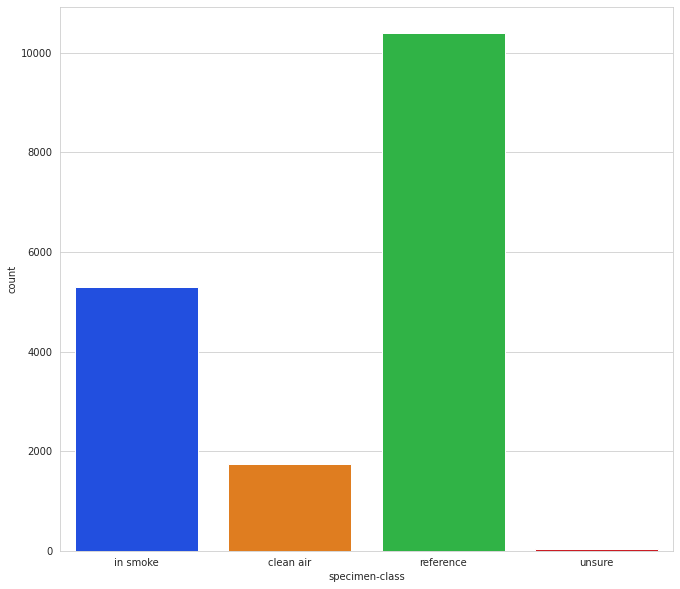

In [136]:
plt.figure(figsize=(11,10))
sns.countplot(data=df_dropped, x='specimen-class', palette='bright')

* Not too much difference with our first visualization

**ENCODE CATEGORICAL DATA**

In [137]:
label_encoder = LabelEncoder()

df_dropped['encoded_class'] = label_encoder.fit_transform(df_dropped['specimen-class'])

In [138]:
df_dropped.columns

Index(['specimen-class', 'gas-scan-temp-0', 'gas-scan-temp-1',
       'gas-scan-temp-2', 'gas-scan-temp-3', 'gas-scan-temp-4',
       'gas-scan-temp-5', 'gas-scan-temp-6', 'gas-scan-temp-7',
       'gas-scan-temp-8', 'gas-scan-temp-9', 'gas-scan-humid-0',
       'gas-scan-humid-1', 'gas-scan-humid-2', 'gas-scan-humid-3',
       'gas-scan-humid-4', 'gas-scan-humid-5', 'gas-scan-humid-6',
       'gas-scan-humid-7', 'gas-scan-humid-8', 'gas-scan-humid-9',
       'gas-scan-0', 'gas-scan-1', 'gas-scan-2', 'gas-scan-3', 'gas-scan-4',
       'gas-scan-5', 'gas-scan-6', 'gas-scan-7', 'gas-scan-8', 'gas-scan-9',
       'encoded_class'],
      dtype='object')

**STANDARDIZE INDEPENDENT VARIABLE**

In [139]:
X = df_dropped.drop(columns=['specimen-class', 'encoded_class'])
y = df_dropped['encoded_class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

**SPLIT DATASET INTO TRAINING AND TEST DATA**

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**OVERSAMPLING**

In [141]:
svm_smote = SVMSMOTE(random_state=42)

X_oversample, y_oversample = svm_smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

# **4. DEFINE MODEL**

In [142]:
knn = KNeighborsClassifier()

knn.fit(X_oversample, y_oversample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# **5. METRICS**

In [143]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       347
           1       0.96      0.95      0.95      1062
           2       0.98      0.99      0.98      2080
           3       0.73      0.89      0.80         9

    accuracy                           0.97      3498
   macro avg       0.90      0.94      0.91      3498
weighted avg       0.97      0.97      0.97      3498



**6. TO DO AND QUESTION**

* Try: drop duplication of non-zero values in gas-scan-temp-0 to gas-scan-9.
* Try : apply advance preprocessing method/advance algorithm.
* Try : apply another sampling method.
* To do : unzip and merge Dryad datapack and perform model on it.
-------------------------------------------------------------------------------
* What if non-zero duplicates in gas-scan-temp-0 to gas-scan-9 get dropped?